In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from ipywidgets import interact
import seaborn as sns
sns.set(style="whitegrid")

#model training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

#model tuning using hyperparameter 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV

#matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [16]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

# EDA

In [3]:
print(test.head())
print(test.info())
print('\n shape of the dataset:', test.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [4]:
print(train.head())
print(train.info())
print('\n shape of the dataset:', train.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

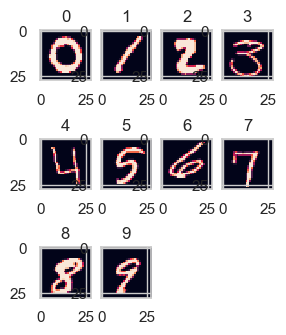

In [5]:
#displaying an example of images with an array working with the train dataset
nptrain = np.array(train)
plt.figure(figsize=(3,4))
for a in range(10):
    for b in range(len(nptrain)):
        if nptrain[b][0] == a:
            plt.subplot(3,4,a+1)
            plt.imshow(nptrain[b][1:].reshape(28,28), interpolation='nearest')
            plt.title(a)
            break
plt.show()

IMAGE LABEL: 5


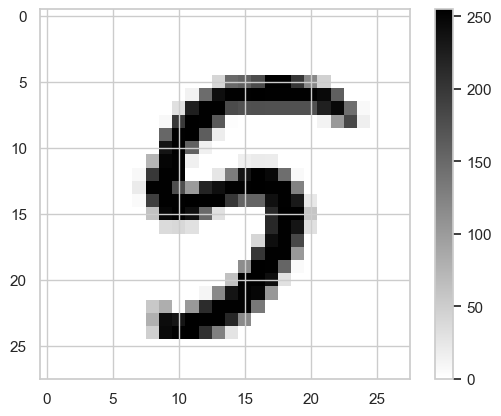

In [6]:
#displaying a single digit with an array

digit_array = train.loc[8, "pixel0":]
arr = np.array(digit_array) 

#reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(train.loc[8, "label"]))

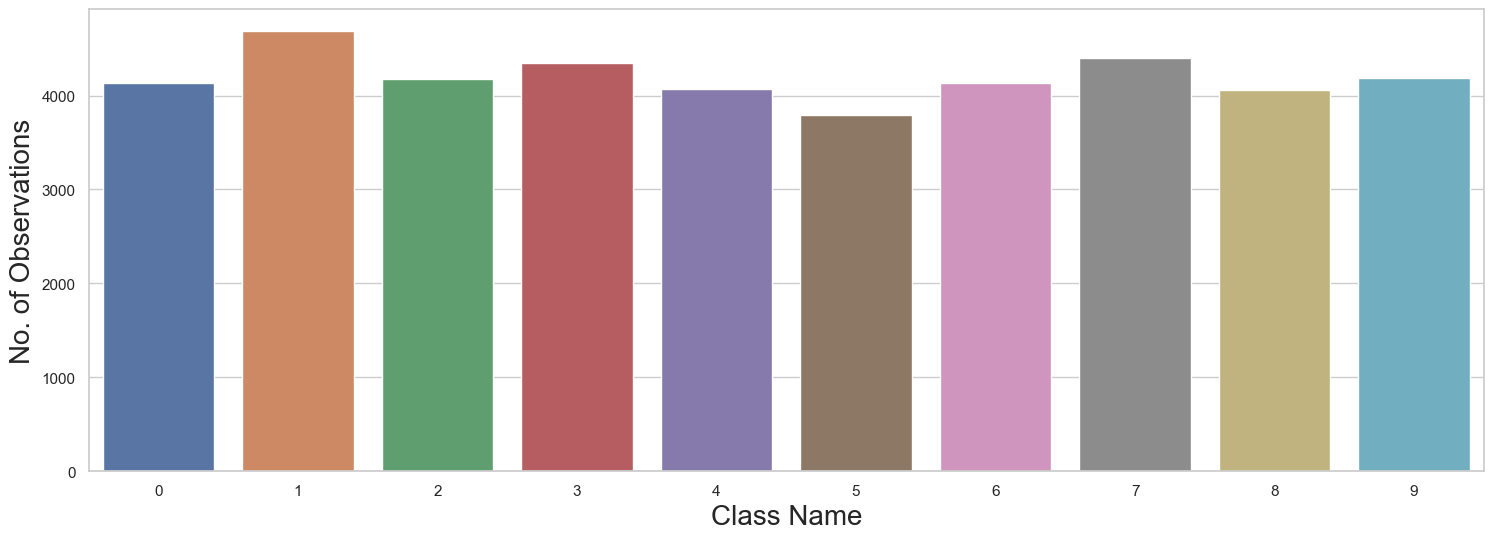

In [7]:
#Class balance in the set
ax = plt.subplots(figsize=(18, 6))
sns.set_style("whitegrid")
sns.countplot(x='label', data=train);
plt.ylabel("No. of Observations", size=20);
plt.xlabel("Class Name", size=20);

In [51]:
#arranging and displaying images of handwritten digits

#reading the digits 
train = pd.read_csv("train.csv")

X = train.iloc[:, 1:].values
X = X.reshape((X.shape[0], 28, 28))/255.

Y = train.iloc[:, 0].values

#specify which digit to show and how many images to display at a time
@interact
def plot_train_set(target = range(10), batch = (0, 263, 1)):
    mpl.rcParams['figure.figsize'] = 4, 4
    class_pictures = X[Y == target]
    side = 3
    for i in range(side):
        for j in range(1, side + 1):
            plt.subplot(side, side, i * side + j)
            temp_index = batch * (side ** 2) + i * side + j - 1
            if temp_index < class_pictures.shape[0]:
                plt.imshow(class_pictures[temp_index], cmap = 'gray')

interactive(children=(Dropdown(description='target', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), IntSlid…

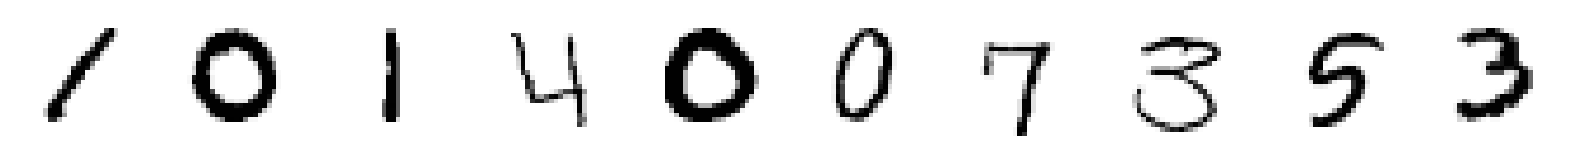

In [9]:
#displaying the pictures of numbes in a row
train_data = train.drop(['label'], axis=1).values.reshape(-1,28,28,1)

num_examples = 10
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(train_data[i], cmap='Greys')
    plt.axis('off')
plt.show()

# Model Training 2

In [16]:
# # Separate the label and features
# y_train = train["label"]
# X_train = train.drop("label", axis=1)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
# # Create and train a Decision Tree classifier
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

In [18]:
# # Predict on the validation set
# y_val_pred = model.predict(X_val)

In [19]:
# # Calculate accuracy on the validation set
# validation_accuracy = metrics.accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))

In [20]:
# # Use the trained model to make predictions on the test data
# result = model.predict(test)

# # Create a DataFrame for submission
# submission = pd.DataFrame({"ImageId": range(1, len(result) + 1), "Label": result})

# # Save the submission file
# submission.to_csv("Surathni_CL-BSCDS-CMU-03-01_st20251928_submission2.csv", index=False)

# Model Training 3

In [40]:
# # Separate the label and features
# y_train = train["label"]
# X_train = train.drop("label", axis=1)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [41]:
# # Define the hyperparameter grid for Grid Search
# param_grid = {
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "max_features": ["auto", "sqrt", "log2"]
# }

In [42]:
# # Create a Decision Tree classifier
# model = DecisionTreeClassifier(random_state=42)

# # Perform Grid Search to find the best hyperparameters
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [43]:
# # Get the best hyperparameters from Grid Search
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [44]:
# # Train a Decision Tree classifier with the best hyperparameters
# best_model = DecisionTreeClassifier(random_state=42, **best_params)
# best_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_features='auto', min_samples_split=10,
                       random_state=42)

In [45]:
# # Predict on the validation set
# y_val_pred = best_model.predict(X_val)

# # Calculate accuracy on the validation set
# validation_accuracy = metrics.accuracy_score(y_val, y_val_pred)
# print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))


Validation Accuracy: 81.82%


In [27]:
# # Use the best trained model to make predictions on the test data
# result = best_model.predict(test)

# # Create a DataFrame for submission
# submission = pd.DataFrame({"ImageId": range(1, len(result) + 1), "Label": result})

# # Save the submission file
# submission.to_csv("Surathni_CL-BSCDS-CMU-03-01_st20251928_submission3.csv", index=False)

# Model Training 4

In [17]:
# Separate the label and features
y_train = train["label"]
X_train = train.drop("label", axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [18]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95, random_state=42) 
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [19]:
# Create an AdaBoost classifier with Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)


In [20]:
# Train the model
model.fit(X_train_pca, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_pca)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [21]:
# Calculate accuracy on the validation set
validation_accuracy = metrics.accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))


Validation Accuracy: 91.80%


In [22]:
# Use the trained model to make predictions on the test data
X_test_pca = pca.transform(test)
result = model.predict(X_test_pca)

# Create a DataFrame for submission
submission = pd.DataFrame({"ImageId": range(1, len(result) + 1), "Label": result})

# Save the submission file
submission.to_csv("Surathni_CL-BSCDS-CMU-03-01_st20251928_submission4.csv", index=False)

# Confusion Matrix

In [23]:
# Calculate the confusion matrix- measure the performance of classification model
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(confusion)



Confusion Matrix:
[[779   0   5   5   1   6  11   0   6   3]
 [  0 890   4   1   1   3   2   1   6   1]
 [  4   3 763  21  14   1   7   9  22   2]
 [  5   0  11 813   5  41   2  11  37  12]
 [  1   0   6   1 771   3   5   3  12  37]
 [  3   1   1  29   8 628   8   1  13  10]
 [  8   1   6   0   2  12 755   0   1   0]
 [  0   5  10   0  14   1   0 817   7  39]
 [  1   1   7  36   8  22   3   2 741  14]
 [  1   2   4  13  28   7   0  20   9 754]]
